<a href="https://colab.research.google.com/github/bhateja684/Movie-Recommendation-Model/blob/main/MovieRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation


In [ ]:
import numpy as np
import pandas as pd
import warnings

In [ ]:
warnings.filterwarnings('ignore')

Getting the dataset

In [ ]:
#giving column names
column_names = ['user_id','item_id','rating','timestamp']
df= pd.read_csv("/content/Dataset/u.data", sep="\t",names=column_names)

In [ ]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
df.shape

(100000, 4)

In [ ]:
df['item_id'].nunique()

1682

In [ ]:
movie_title=pd.read_csv ("/content/Dataset/u.item",sep="|", header=None, encoding="latin-1")

In [ ]:
movie_title.shape

(1682, 24)

In [ ]:
movie_title = movie_title[[0,1]]
#we only needed 1st and 2nd column

In [ ]:
#second way to add columns name
movie_title.columns=["item_id","title"]

movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
movie_title.shape

(1682, 2)

 Merging Both the dataframes

In [ ]:
df=pd.merge(df,movie_title, on="item_id")

In [ ]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)
99999,12,203,3,879959583,Unforgiven (1992)


Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [ ]:
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)
...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)


In [ ]:
#by taking average rating of the movies
df.groupby("title").mean()['rating'].sort_values(ascending=False).head()

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [ ]:
#by how many times the movie has been watched
df.groupby("title").count()['rating'].sort_values(ascending=False).head()


,rating
title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


Making a Dataframe


In [ ]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [ ]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [ ]:
ratings['Number Of Ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [ ]:
ratings.head()

,rating,Number Of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [ ]:
ratings.sort_values('rating',ascending=False)

,rating,Number Of Ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


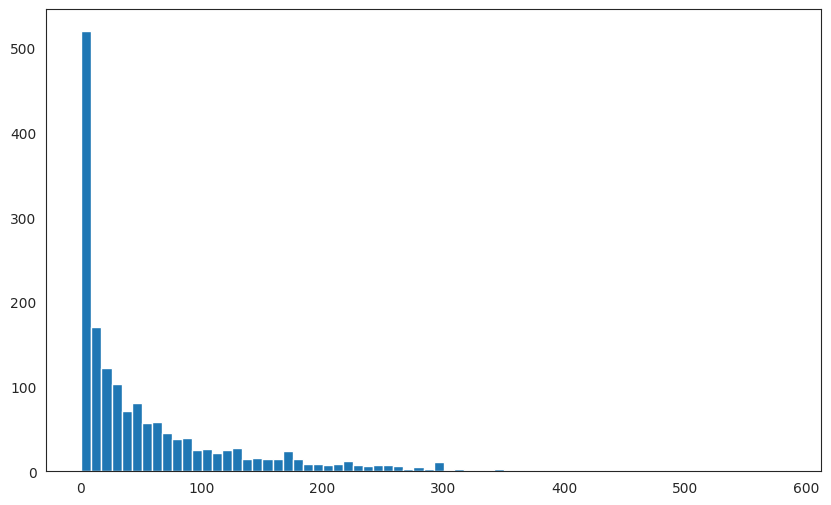

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(ratings["Number Of Ratings"],bins=70)
plt.show()

(array([ 69.,   0.,   1.,   0.,   2.,   4.,   0.,   1.,  11.,   0.,   4.,
          7.,   4.,   3.,   9.,   7.,   6.,  52.,   3.,   7.,  19.,  26.,
         15.,  17.,  34.,  20.,  45.,  21.,  27.,  43.,  45.,  38.,  36.,
         32.,  12., 127.,  40.,  63.,  46.,  45.,  57.,  32.,  53.,  59.,
         42.,  49.,  52.,  36.,  45.,  45.,  35.,  35.,  64.,  24.,  27.,
         14.,  15.,  11.,   5.,   2.,   5.,   5.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,  10.]),
 array([1.        , 1.05714286, 1.11428571, 1.17142857, 1.22857143,
        1.28571429, 1.34285714, 1.4       , 1.45714286, 1.51428571,
        1.57142857, 1.62857143, 1.68571429, 1.74285714, 1.8       ,
        1.85714286, 1.91428571, 1.97142857, 2.02857143, 2.08571429,
        2.14285714, 2.2       , 2.25714286, 2.31428571, 2.37142857,
        2.42857143, 2.48571429, 2.54285714, 2.6       , 2.65714286,
        2.71428571, 2.77142857, 2.82857143, 2.88571429, 2.94285714,
        3.        , 3.05714286, 3.11428571, 3.

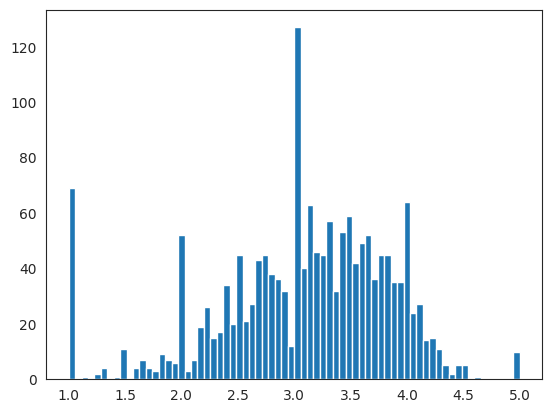

In [ ]:
plt.hist(ratings['rating'],bins=70)

In [ ]:
#x= ratings
#y= no of ratings


In [ ]:
#joint plot


In [ ]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [ ]:
moviemat=df.pivot_table(index="user_id",columns="title",values='rating')

In [ ]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings.sort_values("Number Of Ratings", ascending=False).head()

,rating,Number Of Ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [ ]:
starwars_user_ratings=moviemat["Star Wars (1977)"] #step1
starwars_user_ratings.head()

,Star Wars (1977)
user_id,
1,5.0
2,5.0
3,NaN
4,5.0
5,4.0


In [ ]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings) #step 2

In [ ]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=["correlation"])

In [ ]:
corr_starwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [ ]:
corr_starwars.dropna(inplace=True)  #step3
#dropping all the elements that give NA

In [ ]:
corr_starwars


,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [ ]:
sorted_corr= corr_starwars.sort_values("correlation",ascending=False)

In [ ]:
sorted_corr.head(10) #+1 means highly correlated

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [ ]:
ratings

,rating,Number Of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [ ]:
corr_starwars=corr_starwars.join(ratings["Number Of Ratings"]) #step 4
corr_starwars.head()

,correlation,Number Of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [ ]:
corr_starwars[corr_starwars["Number Of Ratings"]>100].sort_values("correlation",ascending=False)

,correlation,Number Of Ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


Predict Function


In [ ]:
def predict_movies(movie_name):
  movie_user_ratings=moviemat[movie_name] #1

  similar_to_movie = moviemat.corrwith(movie_user_ratings)#2

  corr_movie= pd.DataFrame(similar_to_movie,columns=['correlation'])
  corr_movie.dropna(inplace=True)#3

  corr_movie=corr_movie.join(ratings["Number Of Ratings"]) #4

  predictions=corr_movie[corr_movie["Number Of Ratings"]>100].sort_values("correlation",ascending=False)

  return predictions






In [ ]:
predictions=predict_movies("Titanic (1997)").head()

In [ ]:
predictions

,correlation,Number Of Ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
